<a href="https://colab.research.google.com/github/binit24/FlipRobbo-Assignment./blob/main/Micro_Credit_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f = open("Data file.csv")

In [ ]:
#Reading the Dataset:
df = pd.read_csv('Data file.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(209593, 37)


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
#Creating the copy of the dataset.
df1=df.copy()

In [ ]:
#Dropping Unmaed Column:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
#Checking datatypes:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [ ]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['msisdn', 'pcircle', 'pdate']


In [ ]:
#Checking the unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].nunique()))
        print('********************************************')

msisdn:186243
********************************************
pcircle:1
********************************************
pdate:82
********************************************


In [ ]:
#Checking for null values:
df.isnull().values.any()

False

                      Total Missing Value
label                                   0
msisdn                                  0
aon                                     0
daily_decr30                            0
daily_decr90                            0
rental30                                0
rental90                                0
last_rech_date_ma                       0
last_rech_date_da                       0
last_rech_amt_ma                        0
cnt_ma_rech30                           0
fr_ma_rech30                            0
sumamnt_ma_rech30                       0
medianamnt_ma_rech30                    0
medianmarechprebal30                    0
cnt_ma_rech90                           0
fr_ma_rech90                            0
sumamnt_ma_rech90                       0
medianamnt_ma_rech90                    0
medianmarechprebal90                    0
cnt_da_rech30                           0
fr_da_rech30                            0
cnt_da_rech90                     

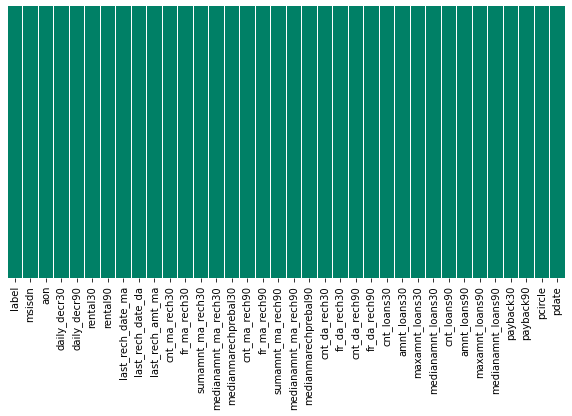

In [ ]:
#Checking the null values in the dataset with graphical representation:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')

In [ ]:
#No null values are present in Dataset thats great:

In [ ]:
#From description we can see that Date is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction:
df['Day']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['Month'] = pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['Year'] = pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

In [ ]:
#Checking the value counts for Year column.
df['Year'].value_counts()

2016    209593
Name: Year, dtype: int64

In [ ]:
#Checking the value count for month column.
df['Month'].value_counts()

7    85765
6    83154
8    40674
Name: Month, dtype: int64

In [ ]:
#Checking the duplicates records in year column.
df['Year'].drop_duplicates()

0    2016
Name: Year, dtype: int64

In [ ]:
#2016 year dataset is present comprising of june,July,August months.

In [ ]:
#Lets drop the Pdate column:
df.drop(columns=['pdate'],axis=1, inplace = True)

In [ ]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(209593, 38)
['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90', 'pcircle', 'Day', 'Month', 'Year']


In [ ]:
#Statistical Analysis
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.0
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321,2016.0
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435,0.0
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,2016.0
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000,2016.0
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000,2016.0
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000,2016.0
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000,2016.0


In [ ]:
#Here we check the summary of object and datetime columns
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
msisdn,209593,186243,47819I90840,7
pcircle,209593,1,UPW,209593


In [ ]:
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.
#Also duplicated records are present in msidn column because phone no is unique for each and every customer.

In [ ]:
#Deleting the duplicates records in msisdn columns:
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 38)

In [ ]:
#Dropping the pcircle column as its not so important.
df.drop(columns=['pcircle'],axis=1,inplace=True)

In [ ]:
#Checking Unique Value in maxamnt_loans90 column:
df['maxamnt_loans90'].unique()

array([ 6, 12,  0])

In [ ]:
#We are going to drop 0 loan Amount as it doesnt make any sense:
df.drop(axis=0, index=df.loc[df['maxamnt_loans90']== 0].index, inplace=True)

In [ ]:
#Again checking the unique value:
df['maxamnt_loans90'].unique()

array([ 6, 12])

In [ ]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

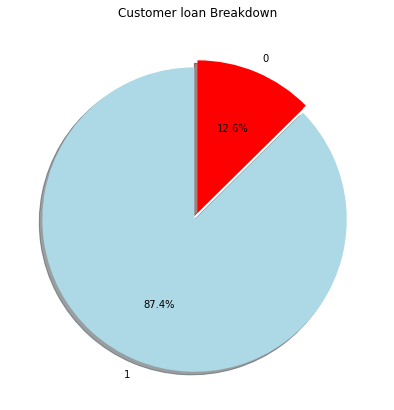

In [ ]:
#univariate Analysis:
from pylab import rcParams 
labels = df['label'].value_counts(sort = True).index
sizes =  df['label'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)
 
rcParams['figure.figsize'] = 7,7
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Customer loan Breakdown')
plt.show()

No of defaulter Customer who havent paid the loan:25860
No of non_defaulter customer who have paid the loan amount:160383


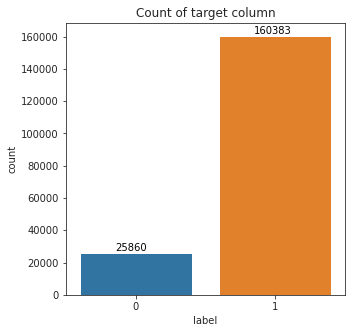

In [ ]:
#Univariate Analysis:
#Checking Count of Target Varibale:
sns.set_style('ticks')
plt.figure(figsize=(5,5))
ax = sns.countplot(df['label'])
non_defaulter,defaulter = df['label'].value_counts()
print("No of defaulter Customer who havent paid the loan:{}".format(defaulter))
print("No of non_defaulter customer who have paid the loan amount:{}".format(non_defaulter))
plt.title('Count of target column')
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

In [ ]:
#We can clearly see its an imbalance Dataset so before jumping into prediction we need to work with it:

label,0,1
Day,,
1,11.8,88.2
2,12.1,87.9
3,12.1,87.9
4,12.7,87.3
5,13.8,86.2


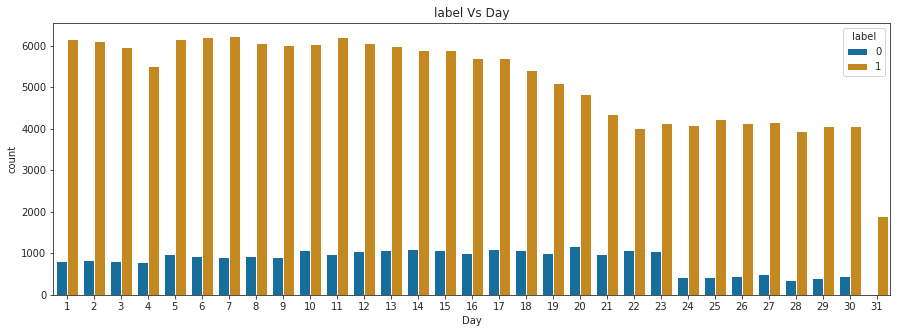

In [ ]:
#Bivariate Analysis:
#Checking the realationship between Date and target column::
plt.subplots(figsize=(15,5))
plt.title('label Vs Day')
sns.countplot(x='Day',hue='label',data=df,palette='colorblind')
pd.crosstab(index=df['Day'],columns=df['label'],normalize='index').apply(lambda r: round((r/r.sum())*100,1),axis=1).head()

label,0,1
Month,,
6,17.7,82.3
7,16.6,83.4
8,0.0,100.0


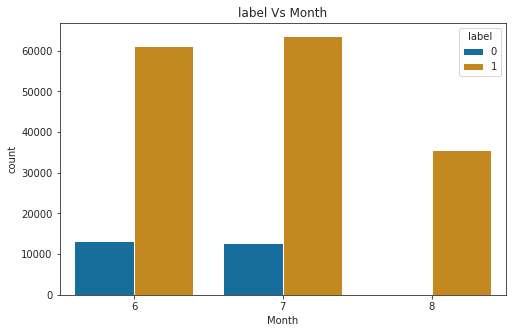

In [ ]:
#Bivariate Analysis:
#Checking the realationship between Date and target column::
plt.subplots(figsize=(8,5))
plt.title('label Vs Month')
sns.countplot(x='Month',hue='label',data=df,palette='colorblind')
pd.crosstab(index=df['Month'],columns=df['label'],normalize='index').apply(lambda r: round((r/r.sum())*100,1),axis=1).head()
#For month of June,July and August.

In [ ]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.
print(df.skew())
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

label                   -2.088847
aon                     10.365026
daily_decr30             4.003019
daily_decr90             4.301490
rental30                 4.676793
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
amnt_loans30             3.006644
maxamnt_loans30         17.718074
medianamnt_loans30       4.470128
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans9

In [ ]:
#As we can see that 33 features are skewed lets check it by using Q-Q plot.

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
#If you want to check whether feature is guassian or normal distributed
#Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

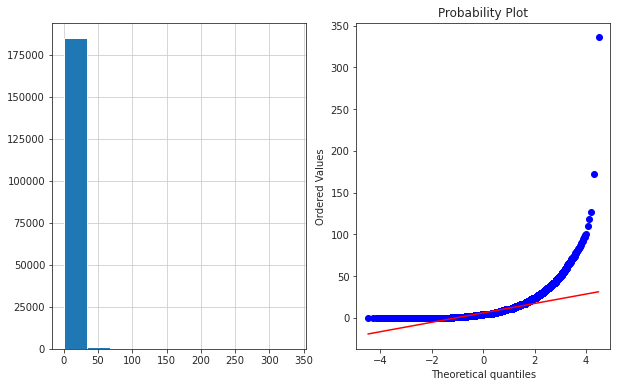

In [ ]:
#checking distribution for cnt_ma_rech90:
plot_data(df,'cnt_ma_rech90')

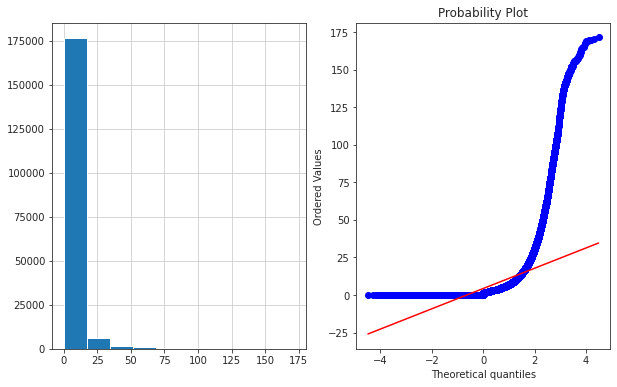

In [ ]:
#checking distribution for payback90:
plot_data(df,'payback90')

In [ ]:
#As we can see Most of the columns is skewed which we have to handel via scaling because if we remove skewness via logarthim method it will results in nan values so lets normalize them.

In [ ]:
#Checking the shape.
df.shape

(186243, 37)

In [ ]:
#Checking for presence of null values:
df.isnull().values.any()

False

In [ ]:
#Creating a copy of our dataset
df2=df1.copy()
#Dropping the object columns
df1.drop(columns=['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [ ]:
#Checking Columns:
columns = list(df1.columns)
print(columns)

['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']


In [ ]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df1))
print("Before removal of outliers:",df1.shape)
df1_final = df1.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df1_final.shape)

Before removal of outliers: (209593, 34)
After removal of outliers: (161465, 34)


In [ ]:
161465/209593*100

77.03740105824146

In [ ]:
#Checking the loss of Information after removal of outliers:
A = 100
B = 77.03740105824146
z = A-B
print("Total loss of imformation after removal of outliers is:",z)

Total loss of imformation after removal of outliers is: 22.962598941758543


In [ ]:
#We can see if we remove the outliers 22.96 of information is lost so we arent going to remove the outliers.
#As per probelm statement we cant afford to loose 7% of Information

In [ ]:
#Dropping msisdn column:
df.drop(columns='msisdn',axis=1,inplace=True)

In [ ]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df.drop('label',axis=1)
y = df['label']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (186243, 35)
shape of y is (186243,)


In [ ]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Lets check for corelation again and remove highly corelated feature as discussed above:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable
corrmat = X_train.corr()

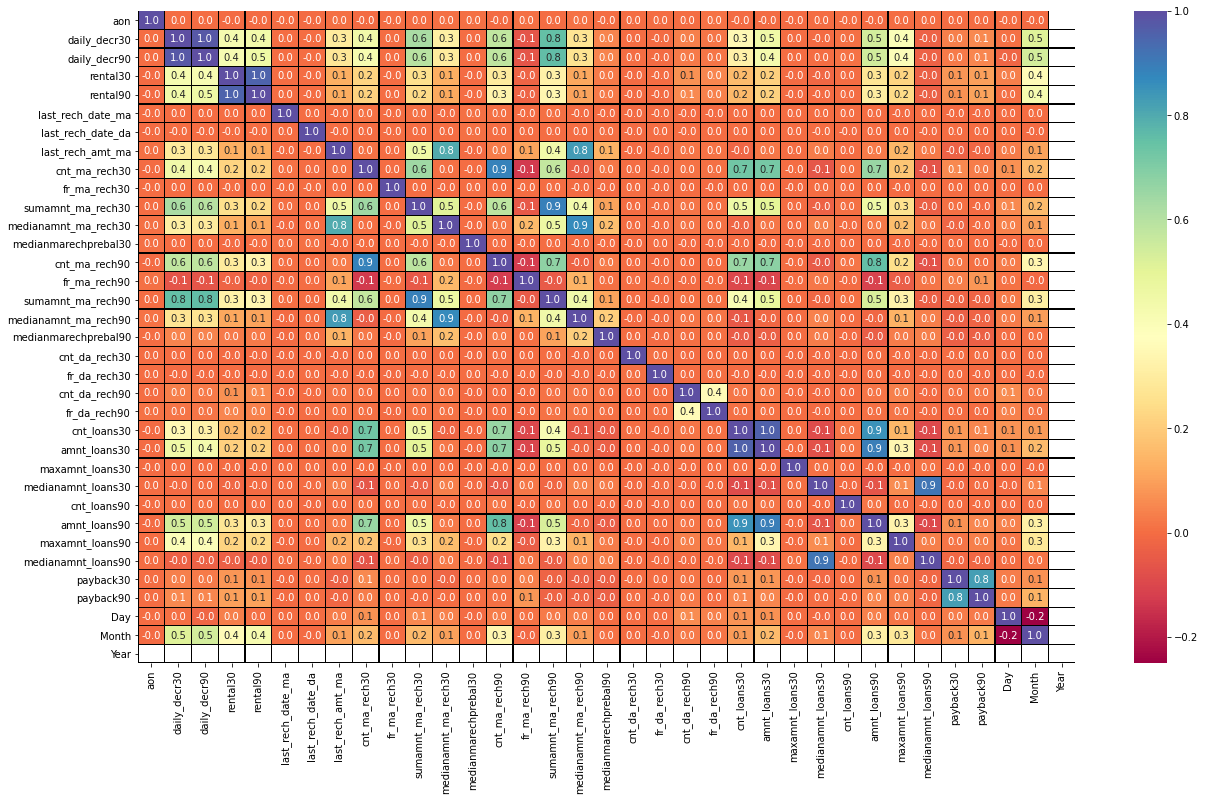

In [ ]:
f,ax=plt.subplots(figsize=(21,12))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [ ]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#rental30 and rental90 features are highly correlated with each other
#daily_decr30 and daily_decr90 are highly corelated
#cnt_loans30 and amount_loans30 columns are highly correlated.
#amount_loans30 is also highly correlated with amount_loans90 column
#medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other
#so as these features are highly corelated with each other they can behave as duplicate feature.

Text(0.5, 1.0, 'corelation with target variable')

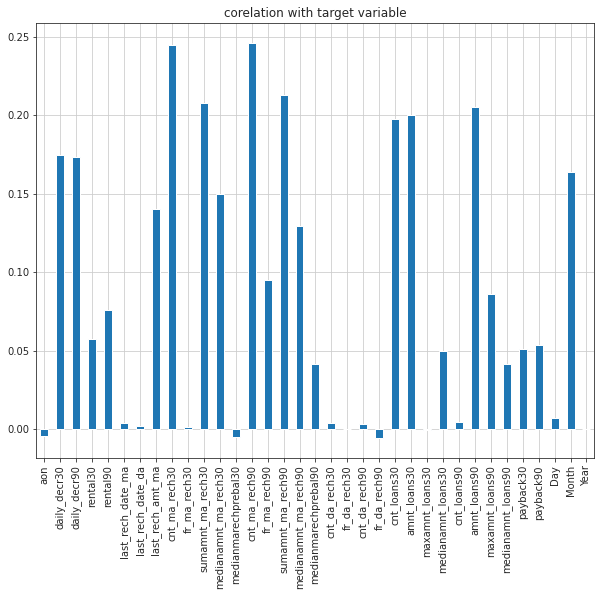

In [ ]:
#corelation with target column:
plt.figure(figsize=(10,8))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [ ]:
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

8

In [ ]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr = X_test.drop(labels=corr_features,axis=1)

In [ ]:
X_train_uncorr.shape, X_test_uncorr.shape

((148994, 27), (37249, 27))

In [ ]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#As we know that output of the model is imbalance Dataset so we have to balance it:
#Applying oversample technique:
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

print("Customer loan Breakdown in  X_train dataset: ", X_train_uncorr.shape)
print("Customer loan Breakdown in  y_train dataset: ", y_train.shape)
print("Customer loan Breakdown in  X_test dataset: ", X_test_uncorr.shape)
print("Customer loan Breakdown in  y_test dataset: ", y_test.shape)

Customer loan Breakdown in  X_train dataset:  (148994, 27)
Customer loan Breakdown in  y_train dataset:  (148994,)
Customer loan Breakdown in  X_test dataset:  (37249, 27)
Customer loan Breakdown in  y_test dataset:  (37249,)


In [ ]:
#Using over Sampling Techique:
from collections import Counter
os = RandomOverSampler(0.75)
X_train_uncorr_res, y_train_res = os.fit_sample(X_train_uncorr, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))
print('After OverSampling, the shape of train_X: {}'.format(X_train_uncorr_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

The number of classes before fit Counter({1: 128268, 0: 20726})
The number of classes after fit Counter({1: 128268, 0: 96201})
After OverSampling, the shape of train_X: (224469, 27)
After OverSampling, the shape of train_y: (224469,) 



In [ ]:
#Importing Models for Predictions:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
#Lets go with Logistic Regression First:
#Implementing Algorithim
model = LogisticRegression()
model.fit(X_train_uncorr_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Lets perform Hyperparametre Tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 
param_grid = {'C': np.logspace(-3, 3, 10),'penalty':['l2','l1']}  
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),scoring='accuracy',verbose=0,n_jobs=-1)

In [ ]:
grid_search.fit(X_train_uncorr_res,y_train_res)
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

accuracy_score: 0.7017906520980429
[[ 4011  1123]
 [ 9985 22130]]
              precision    recall  f1-score   support

           0       0.29      0.78      0.42      5134
           1       0.95      0.69      0.80     32115

    accuracy                           0.70     37249
   macro avg       0.62      0.74      0.61     37249
weighted avg       0.86      0.70      0.75     37249



Text(0.5, 48.29999999999998, 'Predicted label')

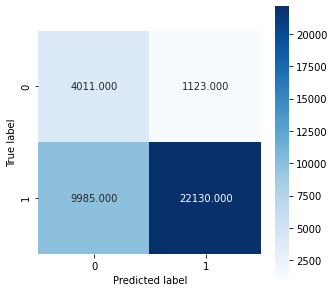

In [ ]:
model = LogisticRegression(C=0.1,penalty='l2')
model.fit(X_train_uncorr_res,y_train_res)
y_predict= model.predict(X_test_uncorr)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#Checking the mean scores f1 score.
scores = cross_val_score(model,X_train_uncorr_res,y_train_res,cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),scoring='f1',n_jobs=-1)

In [ ]:
#Final mean score as the final measure of model performance.
scores.mean()

0.744785489869064

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision Score : ",precision_score(y_test, y_predict))
print("Recall Score : ",recall_score(y_test, y_predict))

Precision Score :  0.9517051563239152
Recall Score :  0.6890860968394831


Average precision-recall score: 0.95


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.95')

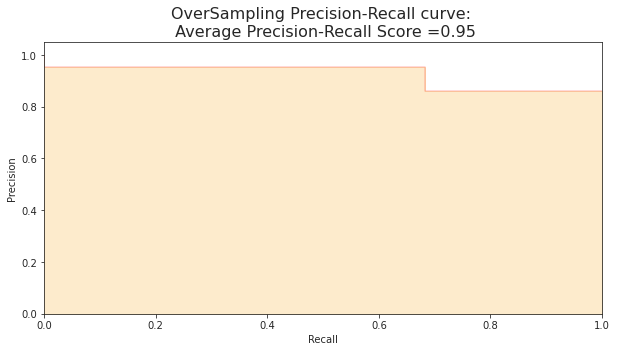

In [ ]:
#Visualizing the Precision and Recall scores after oversampling.
from sklearn.metrics import precision_recall_curve
average_precision = precision_score(y_test, y_predict)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
fig = plt.figure(figsize=(10,5))
precision, recall, _ = precision_recall_curve(y_test, y_predict)
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

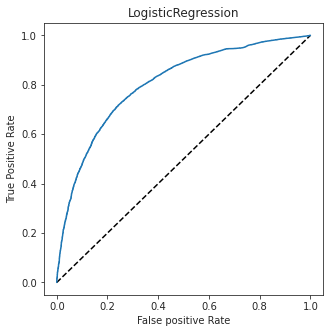

0.7344834808875219


In [ ]:
#AUC and ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(X_test_uncorr)[:,1]
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='LogisticRegression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()

auc_score = roc_auc_score(y_test,y_predict)
print(auc_score)

In [ ]:
#We are getting good F1 score also precision and Recall score are good,always remember in imbalance datset we check F1 score precision and recall which is good in our Case.
#I am not going for any other algorithim beacause its an huge dataset with more than 2000000 records applying Random Forest and other algo will take ample amount of time.
#In our case Logistic Regression Works Fine with oversmapling technique.
#We are getting good precision and Recall Score which is very important in Imbalance Dataset.
#Precision = TP/TP+FP
#Recall  = TP/TP+FN

In [ ]:
#Lets apply Downsampling technique and check the results:
#We are going to use Random Forest Classifier.

In [ ]:
#Creating independent and Dependent Variable:
columns = df.columns.tolist()
#Filter the column and remove data we dont want:
columns = [c for c in columns if c not in ['label']]
#Store the variable we are predicting:
target = "label"
#Define a random state:
state = np.random.RandomState(42)
X = df[columns]
y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0],X.shape[1]))
print(X.shape)
print(y.shape)

(186243, 35)
(186243,)


In [ ]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Lets check for corelation again and remove highly corelated feature as discussed above:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable
corrmat = X_train.corr()

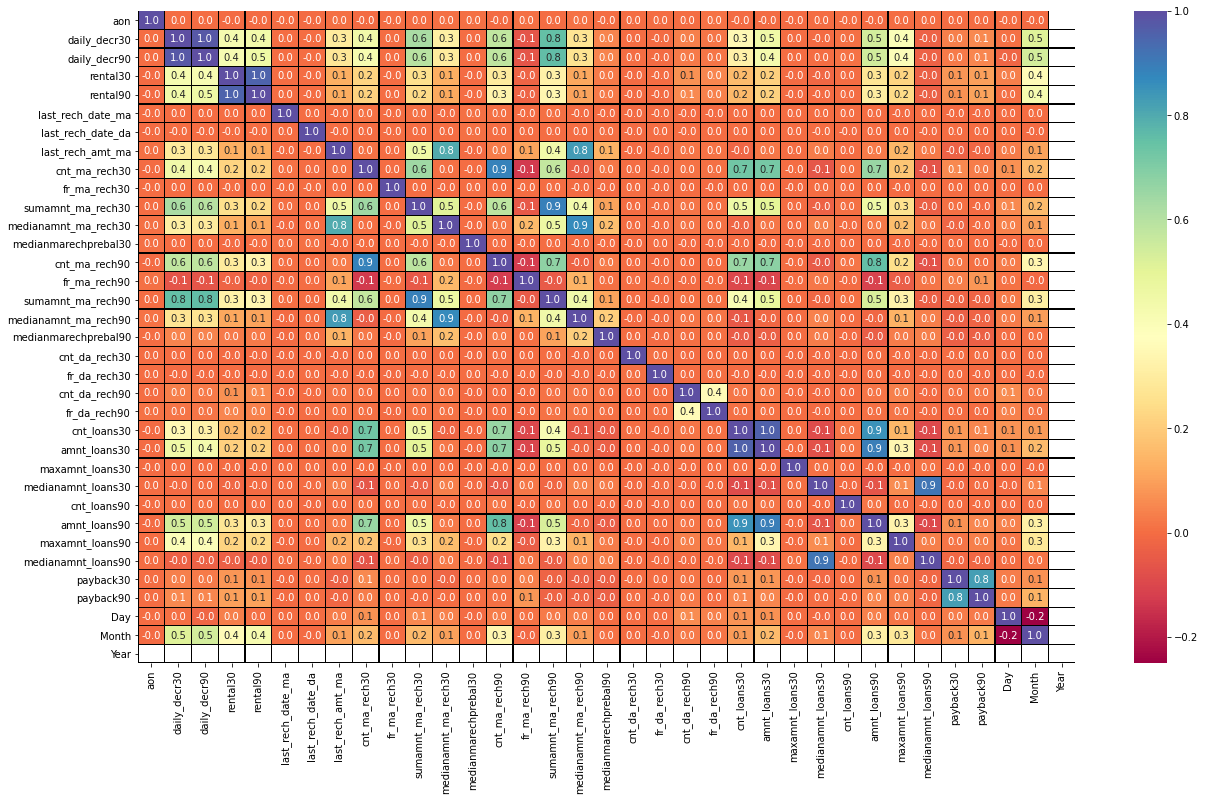

In [ ]:
f,ax=plt.subplots(figsize=(21,12))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [ ]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#rental30 and rental90 features are highly correlated with each other
#daily_decr30 and daily_decr90 are highly corelated
#cnt_loans30 and amount_loans30 columns are highly correlated.
#amount_loans30 is also highly correlated with amount_loans90 column
#medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other
#so as these features are highly corelated with each other they can behave as duplicate feature.

Text(0.5, 1.0, 'corelation with target variable')

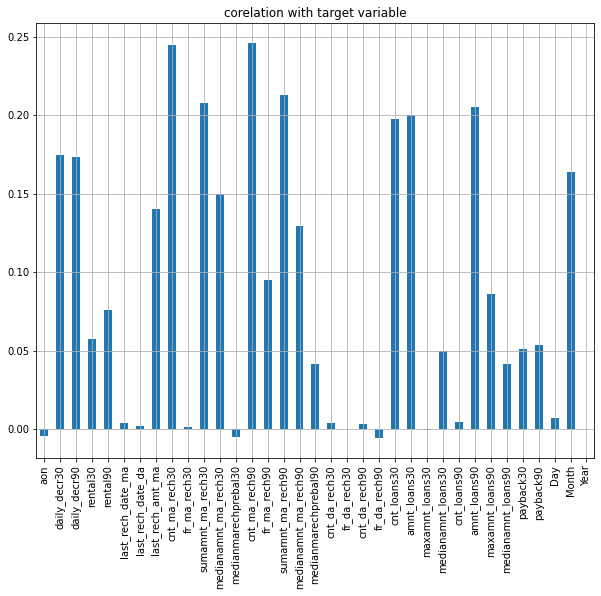

In [ ]:
#corelation with target column:
plt.figure(figsize=(10,8))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [ ]:
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

8

In [ ]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr = X_test.drop(labels=corr_features,axis=1)

In [ ]:
X_train_uncorr.shape, X_test_uncorr.shape

((148994, 27), (37249, 27))

In [ ]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#As we know that output of the model is imbalance Dataset so we have to balance it:
#Applying Downsampling technique:
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split

print("Customer loan Breakdown in  X_train dataset: ", X_train_uncorr.shape)
print("Customer loan Breakdown in  y_train dataset: ", y_train.shape)
print("Customer loan Breakdown in  X_test dataset: ", X_test_uncorr.shape)
print("Customer loan Breakdown in  y_test dataset: ", y_test.shape)

Customer loan Breakdown in  X_train dataset:  (148994, 27)
Customer loan Breakdown in  y_train dataset:  (148994,)
Customer loan Breakdown in  X_test dataset:  (37249, 27)
Customer loan Breakdown in  y_test dataset:  (37249,)


In [ ]:
#Implementing Undersampling for handling Imbalance Dataset:
nm = NearMiss(random_state=42)
X_train_uncorr_res, y_train_res = nm.fit_sample(X_train_uncorr, y_train)

In [ ]:
print('After DownSampling, the shape of train_X: {}'.format(X_train_uncorr_res.shape))
print('After DownSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After DownSampling, the shape of train_X: (41452, 27)
After DownSampling, the shape of train_y: (41452,) 



In [ ]:
#Finding the Counter of Initial Y dependant variabe:
from collections import Counter
print("Original dataset shape {}".format(Counter(y)))
print("Resampled dataset shape {}".format(Counter(y_train_res)))

Original dataset shape Counter({1: 160383, 0: 25860})
Resampled dataset shape Counter({0: 20726, 1: 20726})


In [ ]:
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
#Importing Models for Predictions:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_uncorr_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Create Hyperparametre tuning
parametre = {'max_depth':[3,5,10,None],'n_estimators':[10,100,200,300,400,500],'max_features':randint(1,3),'criterion':['gini','entropy'],'bootstrap':[True,False],'min_samples_leaf':randint(1,4)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
random_grid = RandomizedSearchCV(classifier,param_distributions= parametre,cv=9,scoring='f1',n_jobs=-1)

In [ ]:
random_grid.fit(X_train_uncorr_res,y_train_res)
random_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 3,
 'n_estimators': 500}

accuracy_score: 0.32862627184622406
[[ 4326   808]
 [24200  7915]]
              precision    recall  f1-score   support

           0       0.15      0.84      0.26      5134
           1       0.91      0.25      0.39     32115

    accuracy                           0.33     37249
   macro avg       0.53      0.54      0.32     37249
weighted avg       0.80      0.33      0.37     37249



Text(0.5, 48.29999999999998, 'Predicted label')

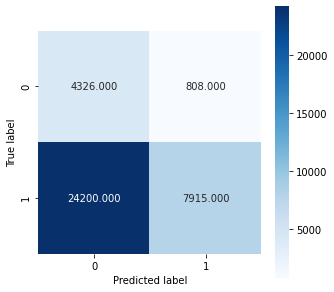

In [ ]:
classifier = RandomForestClassifier(bootstrap=False,criterion='gini',max_features=1,min_samples_leaf=3,n_estimators=500)
classifier.fit(X_train_uncorr_res,y_train_res)
y_predict= classifier.predict(X_test_uncorr)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#Checking the mean scores f1 score.
from sklearn.model_selection import StratifiedKFold 
scores = cross_val_score(classifier,X_train_uncorr_res,y_train_res,cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),scoring='f1',n_jobs=-1)

In [ ]:
#Final mean score as the final measure of model performance.
scores.mean()

0.7823927397702762

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision Score : ",precision_score(y_test, y_predict))
print("Recall Score : ",recall_score(y_test, y_predict))

Precision Score :  0.9073713172073827
Recall Score :  0.24645804141366962


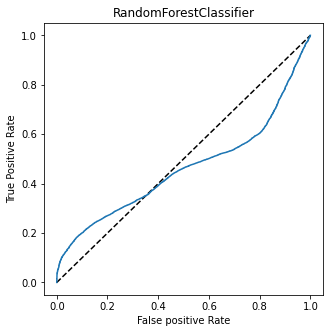

0.544537941626196


In [ ]:
#AUC and ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = classifier.predict_proba(X_test_uncorr)[:,1]
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='RandomForestClassifier')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.show()

auc_score = roc_auc_score(y_test,y_predict)
print(auc_score)

In [ ]:
#Downsampling Techique is not working Fine Hence we are going to consider Oversampling Technique as we are getting good F1 score altogether with good precision and Recall.
#In Downsampling Technique we are getting very low Recall Score 24% Which is too low.
#We are going to consider Logistic Regression as our final model.

In [ ]:
#Saving the best Model: Logistic-Regression 
import joblib
joblib.dump(model,'model.obj')
model_from_joblib = joblib.load('model.obj')
model_from_joblib.predict(X_test_uncorr)[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])